In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2 as cv
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_sample_metadata = pd.read_json('/content/drive/MyDrive/DL Project/metadata.json').T
train_sample_metadata.head()

,label,split,original
aagfhgtpmv.mp4,FAKE,train,vudstovrck.mp4
aapnvogymq.mp4,FAKE,train,jdubbvfswz.mp4
abarnvbtwb.mp4,REAL,train,None
abofeumbvv.mp4,FAKE,train,atvmxvwyns.mp4
abqwwspghj.mp4,FAKE,train,qzimuostzz.mp4


In [ ]:
train_sample_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, aagfhgtpmv.mp4 to eukvucdetx.mp4
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     400 non-null    object
 1   split     400 non-null    object
 2   original  323 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [ ]:
train_sample_metadata['label'].value_counts()

,count
label,
FAKE,323
REAL,77


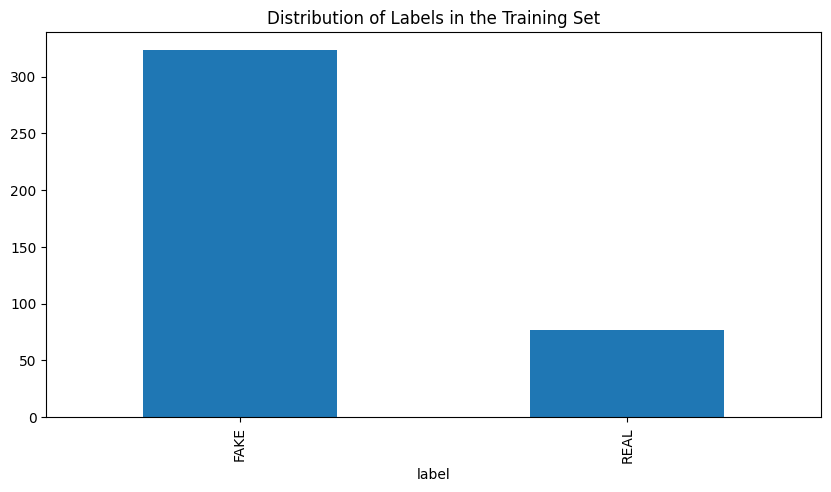

In [ ]:
train_sample_metadata.groupby('label')['label'].count().plot(figsize=(10, 5), kind='bar', title='Distribution of Labels in the Training Set')
plt.show()

In [ ]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [ ]:
unique_values(train_sample_metadata)

,label,split,original
Total,400,400,323
Uniques,2,1,209


In [ ]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequency'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))


In [ ]:
most_frequent_values(train_sample_metadata)

,label,split,original
Total,400,400,323
Most frequent item,FAKE,train,atvmxvwyns.mp4
Frequency,323,400,6
Percent from total,80.75,100.0,1.858


In [ ]:
original_counts = pd.DataFrame(train_sample_metadata['original'].value_counts())
original_counts.head(10)

,count
original,
atvmxvwyns.mp4,6
meawmsgiti.mp4,6
qeumxirsme.mp4,5
kgbkktcjxf.mp4,5
fysyrqfguw.mp4,4
gjypopglvi.mp4,4
dzyuwjkjui.mp4,4
gipbyjfxfp.mp4,4
ywvlvpvroj.mp4,4


In [ ]:
real_train_sample_video = list(train_sample_metadata.loc[train_sample_metadata.label=='REAL'].sample(5).index)    # returning the index value which is video name
real_train_sample_video

['eudeqjhdfd.mp4',
 'chtapglbcj.mp4',
 'ekcrtigpab.mp4',
 'egghxjjmfg.mp4',
 'dsjbknkujw.mp4']

In [ ]:
from IPython.display import HTML
from base64 import b64encode

def play_video(video_file):
    '''
    Display video
    param: video_file - the name of the video file to display
    param: subset - the folder where the video file is located (can be TRAIN_SAMPLE_FOLDER or TEST_Folder)
    '''
    video_url = open(video_file,'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(video_url).decode()
    return HTML("""<video width=500 controls><source src="%s" type="video/mp4"></video>""" % data_url)

In [ ]:
play_video("/content/drive/MyDrive/DL Project/Dataset/test_sample_videos/acazlolrpz.mp4")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
videos = glob.glob('/content/drive/MyDrive/DL Project/Dataset/test_sample_videos/*.mp4')
frame_cnt = []
for video in videos:
  capture = cv.VideoCapture(video)
  frame_cnt.append(int(capture.get(cv.CAP_PROP_FRAME_COUNT)))
print("Frames: ",frame_cnt)
print("Avg Frame per video: ",np.mean(frame_cnt))

Frames:  [300, 300, 300, 299, 300, 300, 300, 300, 300, 300, 300, 299, 300, 299, 300, 300, 300, 300, 299, 300, 300, 300, 300, 300, 300, 299, 300, 300, 300, 300, 299, 300, 300, 300, 299, 299, 300, 300, 300, 300, 300, 300, 300, 300, 300, 299, 300, 299, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 299, 300, 300, 300, 300, 300, 300, 299, 300, 300, 299, 299, 300, 300, 299, 300, 299, 299, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 299, 299, 300, 300, 300, 299, 299, 300, 300, 300, 300, 300, 300, 299, 300, 300, 300, 300, 300, 300, 300, 300, 300, 299, 300, 300, 299, 300, 300, 300, 299, 300, 299, 300, 300, 300, 300, 300, 300, 300, 299, 300, 300, 299, 299, 300, 300, 300, 299, 300, 300, 300, 299, 300, 299, 300, 299, 300, 299, 299, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 299, 300, 300, 300, 300, 299, 300, 300, 300, 300, 300, 299, 300, 300, 300, 300, 300, 300, 300, 300, 299, 300, 299, 300, 300, 300, 

In [ ]:
!pip install face_recognition

In [ ]:
def image_from_video(video_path):
    '''
    input: video_path - path for video
    process:
    1. perform a video capture from the video
    2. read the image
    3. display the image
    '''
    capture_image = cv.VideoCapture(video_path)
    ret, frame = capture_image.read()
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)   # converting the frame color to RGB
    ax.imshow(frame)

    return frame

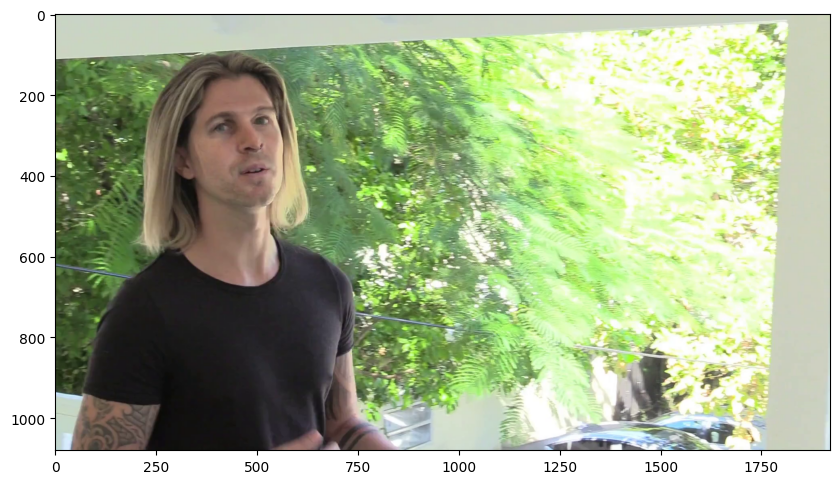

In [ ]:
image = image_from_video("/content/drive/MyDrive/DL Project/Dataset/train_sample_videos/aagfhgtpmv.mp4")

In [ ]:
!apt update
!apt-get install cuda -y
!apt-get install libcudnn8 libcudnn8-dev -y

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
31 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InR

In [ ]:
# Check current driver version
!nvidia-smi

# Install a specific CUDA version. Here, it's for CUDA 11.8, but you should replace with the appropriate version
!wget https://developer.download.nvidia.com/compute/cuda/11.8.0/local_installers/cuda_11.8.0_520.61.05_linux.run
!sudo sh cuda_11.8.0_520.61.05_linux.run --silent --toolkit

# Update alternatives
!sudo update-alternatives --install /usr/local/cuda cuda /usr/local/cuda-11.8 100

# Restart the runtime to ensure changes are applied.


NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.

--2025-03-07 15:35:05--  https://developer.download.nvidia.com/compute/cuda/11.8.0/local_installers/cuda_11.8.0_520.61.05_linux.run
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 23.203.48.33, 23.203.48.38
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|23.203.48.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4336730777 (4.0G) [application/octet-stream]
Saving to: ‘cuda_11.8.0_520.61.05_linux.run’

cuda_11.8.0_520.61. 100%[===================>]   4.04G  90.4MB/s    in 59s     

2025-03-07 15:36:04 (70.6 MB/s) - ‘cuda_11.8.0_520.61.05_linux.run’ saved [4336730777/4336730777]

update-alternatives: warning: forcing reinstallation of alternative /usr/local/cuda-12.8 because link group cuda is broken


In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
import face_recognition

In [ ]:
face_locations = face_recognition.face_locations(image)

from PIL import Image


for face_location in face_locations:

  top,right,bottom,left = face_location
  print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

  face_image = image[top:bottom, left:right]
  fig, ax = plt.subplots(1,1, figsize=(5, 5))
  plt.grid(False)
  ax.xaxis.set_visible(False)
  ax.yaxis.set_visible(False)
  ax.imshow(face_image)

NameError: name 'face_recognition' is not defined